In [1]:
%cd 'python/AggNet'
%ls

/home/hew/python/AggNet
data/  framework/  main.py  script/  temp/


In [2]:
from framework import paths

paths

========== add root_path and framework_path to sys.path ==========
root_path: /home/hew/python/AggNet
framework_path: /home/hew/python/AggNet/framework


{'path_dataset': '/home/hew/python/data/', 'root': '/home/hew/python/AggNet/', 'data': '/home/hew/python/AggNet/data/', 'script': '/home/hew/python/AggNet/script/', 'temp': '/home/hew/python/AggNet/temp/', 'framework': '/home/hew/python/AggNet/framework/', 'config': '/home/hew/python/AggNet/framework/config/', 'module': '/home/hew/python/AggNet/framework/module/', 'utils': '/home/hew/python/AggNet/framework/utils/'}

In [3]:
%cd 'framework/environment/check'
%ls

/home/hew/python/AggNet/framework/environment/check
device.ipynb  lightning_logs/  MNIST/  package.ipynb


# pytorch

In [4]:
import torch

x = torch.randn([4, 8])  # Gaussian(0, 1) float
y = torch.randint(0, 10, [4, 8])  # [0, 10) integer
z = torch.rand(3, 4)  # [0, 1] float
print('x:', x.device, x.dtype, '\n', x)
print('y:', y.device, y.dtype, '\n', y)
print('z:', z.device, z.dtype, '\n', z)

x: cpu torch.float32 
 tensor([[ 0.1573,  0.3233, -0.1688, -0.2706,  1.1577,  0.6455,  1.5494,  0.1635],
        [ 0.5716,  1.7270,  0.8961, -0.0548, -1.3007, -0.2785,  1.1996,  1.7333],
        [ 0.2636,  0.1495,  1.3049, -0.1980, -0.0311, -0.5779,  0.3601,  1.8673],
        [-1.7628,  0.5562, -0.1875, -0.0866, -0.6309, -0.1830,  1.6571,  0.0268]])
y: cpu torch.int64 
 tensor([[3, 0, 0, 1, 0, 0, 5, 3],
        [8, 8, 6, 8, 8, 6, 9, 5],
        [5, 6, 8, 7, 1, 9, 4, 5],
        [2, 2, 5, 4, 4, 9, 8, 1]])
z: cpu torch.float32 
 tensor([[0.6165, 0.7321, 0.6586, 0.0809],
        [0.7025, 0.9855, 0.6828, 0.4210],
        [0.1450, 0.8402, 0.6575, 0.5293]])


In [5]:
x = torch.ones_like(x, dtype=torch.float)
y = torch.zeros_like(x)
print('x:', x.device, x.dtype, '\n', x)
print('y:', y.device, y.dtype, '\n', y)
y.dtype, y.to(torch.int64).dtype, y.to(torch.float).dtype, y.to(torch.double).dtype

x: cpu torch.float32 
 tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])
y: cpu torch.float32 
 tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


(torch.float32, torch.int64, torch.float32, torch.float64)

In [6]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
# torch.cuda.set_device(0)
print('device:', device)
y = torch.ones_like(x, device=device)
x = x.to(device)
# x = x.cuda()
z = x + y
print(z)
print(z.to('cpu', torch.double))

device: cuda:0
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.]], device='cuda:0')
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.]], dtype=torch.float64)


In [7]:
torch.__version__

'1.12.1'

# numpy, matplotlib

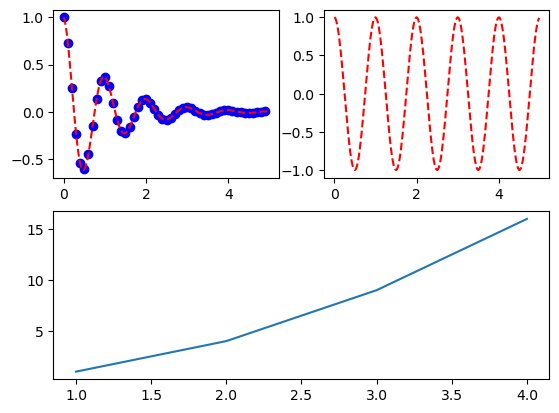

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)


t1 = np.arange(0, 5, 0.1)
t2 = np.arange(0, 5, 0.02)

plt.figure(12)
plt.subplot(221)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'r--')

plt.subplot(222)
plt.plot(t2, np.cos(2 * np.pi * t2), 'r--')

plt.subplot(212)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

# pandas

In [9]:
import numpy as np
import pandas as pd

df = np.random.random([5, 6])
df = pd.DataFrame(df)
df

,0,1,2,3,4,5
0,0.320764,0.891749,0.984494,0.330798,0.961069,0.606727
1,0.548853,0.848548,0.784333,0.122314,0.075589,0.513409
2,0.759026,0.695816,0.411546,0.268716,0.370359,0.127032
3,0.488780,0.271381,0.952558,0.487271,0.821115,0.032154
4,0.369638,0.375879,0.967808,0.015479,0.113740,0.201555


In [10]:
df.describe()

,0,1,2,3,4,5
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.497412,0.616675,0.820148,0.244915,0.468375,0.296175
std,0.172260,0.279689,0.242169,0.183269,0.405224,0.250451
min,0.320764,0.271381,0.411546,0.015479,0.075589,0.032154
25%,0.369638,0.375879,0.784333,0.122314,0.113740,0.127032
50%,0.488780,0.695816,0.952558,0.268716,0.370359,0.201555
75%,0.548853,0.848548,0.967808,0.330798,0.821115,0.513409
max,0.759026,0.891749,0.984494,0.487271,0.961069,0.606727


# pytorch-lightning

In [11]:
torch.set_float32_matmul_precision('high')

In [12]:
%%time
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision as tv
import lightning as L


# --------------------------------
# Step 1: Define a LightningModule
# --------------------------------
# A LightningModule (nn.Module subclass) defines a full *system*
# (ie: an LLM, diffusion model, autoencoder, or simple image classifier).

class LitAutoEncoder(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 512), nn.ReLU(), nn.Linear(512, 256))
        self.decoder = nn.Sequential(nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 28 * 28))

    def forward(self, x):
        # in lightning, forward defines the prediction/inference actions
        embedding = self.encoder(x)
        return embedding

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop. It is independent of forward
        x, y = batch
        x = x.view(x.size(0), -1)
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = F.mse_loss(x_hat, x)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        # training_step defines the train loop. It is independent of forward
        x, y = batch
        x = x.view(x.size(0), -1)
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = F.mse_loss(x_hat, x)
        self.log("valid_loss", loss)
        return loss

    def test_step(self, batch, batch_idx):
        # training_step defines the train loop. It is independent of forward
        x, y = batch
        x = x.view(x.size(0), -1)
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = F.mse_loss(x_hat, x)
        self.log("test_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer


# -------------------
# Step 2: Define data
# -------------------
dataset = tv.datasets.MNIST(os.path.join(os.getcwd()), download=True, transform=tv.transforms.ToTensor(), train=True)
train, val = data.random_split(dataset, [55000, 5000])

# dataloader 的 batch_size 和 num_workers 对启动时间影响很大，batch_size越小启动时间越短，有时候num_workers越大启动时间反而越长，需要根据具体情况调整
# train_loader = data.DataLoader(train, batch_size=1, num_workers=multiprocessing.cpu_count())
# train_loader = data.DataLoader(train, batch_size=1, num_workers=multiprocessing.cpu_count()//2)
# val_loader = data.DataLoader(val, batch_size=1, num_workers=multiprocessing.cpu_count()//2)
train_loader = data.DataLoader(train, batch_size=1024, num_workers=1, pin_memory=True, persistent_workers=True)
val_loader = data.DataLoader(val, batch_size=1024, num_workers=1, pin_memory=True, persistent_workers=True)

# -------------------
# Step 3: Train
# -------------------
print('start training')
autoencoder = LitAutoEncoder()
# trainer = L.Trainer(limit_train_batches=400, limit_val_batches=400, limit_test_batches=2000, val_check_interval=20, max_epochs=1)
trainer = L.Trainer(max_epochs=10)
trainer.fit(autoencoder, train_loader, val_loader)

start training


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 533 K 
1 | decoder | Sequential | 533 K 
---------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.268     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/hew/anaconda3/envs/AggNet/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 28 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/hew/anaconda3/envs/AggNet/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 28 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

CPU times: user 5.5 s, sys: 1.08 s, total: 6.58 s
Wall time: 13.2 s


/home/hew/anaconda3/envs/AggNet/lib/python3.10/site-packages/lightning/pytorch/trainer/call.py:54: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [13]:
%%time
test = tv.datasets.MNIST(os.path.join(os.getcwd()), download=True, transform=tv.transforms.ToTensor(), train=False)
test_loader = data.DataLoader(test, batch_size=1024, num_workers=1, pin_memory=True,
                              persistent_workers=True)  # 1.4 seconds
# test_loader = data.DataLoader(test, batch_size=1024, num_workers=2., pin_memory=True, persistent_workers=True)  # 1.4 seconds
# test_loader = data.DataLoader(test, batch_size=1024, num_workers=4, pin_memory=True, persistent_workers=True)  # 1.5 seconds
# test_loader = data.DataLoader(test, batch_size=1024, num_workers=8, pin_memory=True, persistent_workers=True)  # 1.7 seconds
# test_loader = data.DataLoader(test, batch_size=1024, num_workers=16, pin_memory=True, persistent_workers=True)  # 2.3 seconds
# test_loader = data.DataLoader(test, batch_size=1, num_workers=multiprocessing.cpu_count())  # 9 seconds
# test_loader = data.DataLoader(test, batch_size=128, num_workers=multiprocessing.cpu_count())  # 7 seconds
# test_loader = data.DataLoader(test, batch_size=256, num_workers=multiprocessing.cpu_count())  # 7 seconds
# test_loader = data.DataLoader(test, batch_size=512, num_workers=multiprocessing.cpu_count())  # 7 seconds
trainer.test(autoencoder, test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/hew/anaconda3/envs/AggNet/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 28 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.026698065921664238    │
└───────────────────────────┴───────────────────────────┘

CPU times: user 113 ms, sys: 118 ms, total: 231 ms
Wall time: 1.84 s


[{'test_loss': 0.026698065921664238}]

In [14]:
from framework.utils.file.path_utils import list_files

ckpt_dir = './lightning_logs/version_0/checkpoints'
list_files(ckpt_dir)

['epoch=0-step=54.ckpt']

In [15]:
# load checkpoint
checkpoint = list_files(ckpt_dir, absolute=True)[0]
autoencoder = LitAutoEncoder.load_from_checkpoint(checkpoint)

# choose your trained nn.Module
encoder = autoencoder.encoder
encoder.eval()

# embed 4 fake images!
fake_image_batch = torch.Tensor(4, 28 * 28).to(autoencoder.device)
embeddings = encoder(fake_image_batch)
print("⚡" * 20, "\nPredictions (4 image embeddings):\n", embeddings, "\n", "⚡" * 20)

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ 
Predictions (4 image embeddings):
 tensor([[        nan,         nan,         nan,  ...,         nan,
                 nan,         nan],
        [-9.8708e+23,  1.5982e+24,  1.1222e+24,  ...,  3.0934e+24,
         -1.0971e+24,  1.9051e+24],
        [-4.3369e+23,  2.0189e+24,  4.7750e+23,  ...,  3.8577e+23,
         -2.9261e+23,  7.8432e+23],
        [ 1.7081e+23,  1.7789e+23,  1.5732e+23,  ...,  4.2640e+23,
          4.1530e+23,  6.6199e+23]], device='cuda:0', grad_fn=<AddmmBackward0>) 
 ⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡
